# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline


Bad key savefig.frameon in file C:\Users\sures\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\sures\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\sures\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi


In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

# Show sample article
bitcoin_news["articles"][0]


Total articles about Bitcoin: 7957


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

# Show sample article
ethereum_news["articles"][0]


Total articles about Ethereum: 2706


{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
 'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
 'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-10-16T18:50:00Z',
 'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other pub

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu          
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
2,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
3,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
4,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu          
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.096681,0.046800,0.023600,0.929600
std,0.347274,0.061512,0.049683,0.074022
min,-0.790600,0.000000,0.000000,0.659000
25%,0.000000,0.000000,0.000000,0.889250
50%,0.000000,0.000000,0.000000,0.930500
75%,0.366350,0.080000,0.010250,1.000000
max,0.755800,0.219000,0.280000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()


,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.176387,0.066120,0.023650,0.910220
std,0.346139,0.070029,0.045433,0.082862
min,-0.735100,0.000000,0.000000,0.620000
25%,0.000000,0.000000,0.000000,0.857250
50%,0.070800,0.056000,0.000000,0.920000
75%,0.476700,0.105000,0.038000,1.000000
max,0.916500,0.380000,0.210000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ehtereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
sw = sw.union(sw_addons)


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)    
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = []
for index, article in bitcoin_df.iterrows():
    bitcoin_tokens.append(tokenizer(article["text"]))

bitcoin_df["tokens"] = bitcoin_tokens
bitcoin_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, bitcoin, sustaining, gain, push..."
2,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
3,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
4,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901,"[last, wall, street, journal, ran, piece, thre..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_tokens = []
for index, article in ethereum_df.iterrows():
    ethereum_tokens.append(tokenizer(article["text"]))

ethereum_df["tokens"] = ethereum_tokens
ethereum_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, ha, advice, people, new, investi..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokens_content = []
for tokens in bitcoin_tokens:
    for token in tokens:
        bitcoin_tokens_content.append(token)
    
bitcoin_bigram_counts = Counter(ngrams(bitcoin_tokens_content, n=2))
print(list(dict(bitcoin_bigram_counts).items())[:5])


[(('similar', 'hoax'), 1), (('hoax', 'earlier'), 1), (('earlier', 'year'), 1), (('year', 'tied'), 1), (('tied', 'walmart'), 1)]


In [18]:
# Generate the Ethereum N-grams where N=2
ethereum_tokens_content = []
for tokens in ethereum_tokens:
    for token in tokens:
        ethereum_tokens_content.append(token)
    
ethereum_bigram_counts = Counter(ngrams(ethereum_tokens_content, n=2))
print(list(dict(ethereum_bigram_counts).items())[:5])


[(('new', 'crosschain'), 1), (('crosschain', 'bridge'), 2), (('bridge', 'currently'), 1), (('currently', 'connected'), 1), (('connected', 'ethereum'), 1)]


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
print(token_count(bitcoin_bigram_counts, 10))


[(('oct', 'reuters'), 16), (('exchangetraded', 'fund'), 14), (('char', 'bitcoin'), 10), (('new', 'york'), 10), (('char', 'representation'), 9), (('reuters', 'bitcoin'), 9), (('illustration', 'taken'), 8), (('bitcoin', 'future'), 8), (('cryptocurrency', 'bitcoin'), 7), (('bitcoin', 'seen'), 7)]


In [21]:
# Use token_count to get the top 10 words for Ethereum
print(token_count(ethereum_bigram_counts, 10))


[(('shiba', 'inu'), 6), (('elon', 'musk'), 5), (('bitcoin', 'ethereum'), 5), (('illustration', 'taken'), 5), (('taken', 'june'), 5), (('alltime', 'high'), 5), (('via', 'getty'), 5), (('char', 'bitcoin'), 4), (('cryptocurrencies', 'bitcoin'), 4), (('ethereum', 'dogecoin'), 4)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

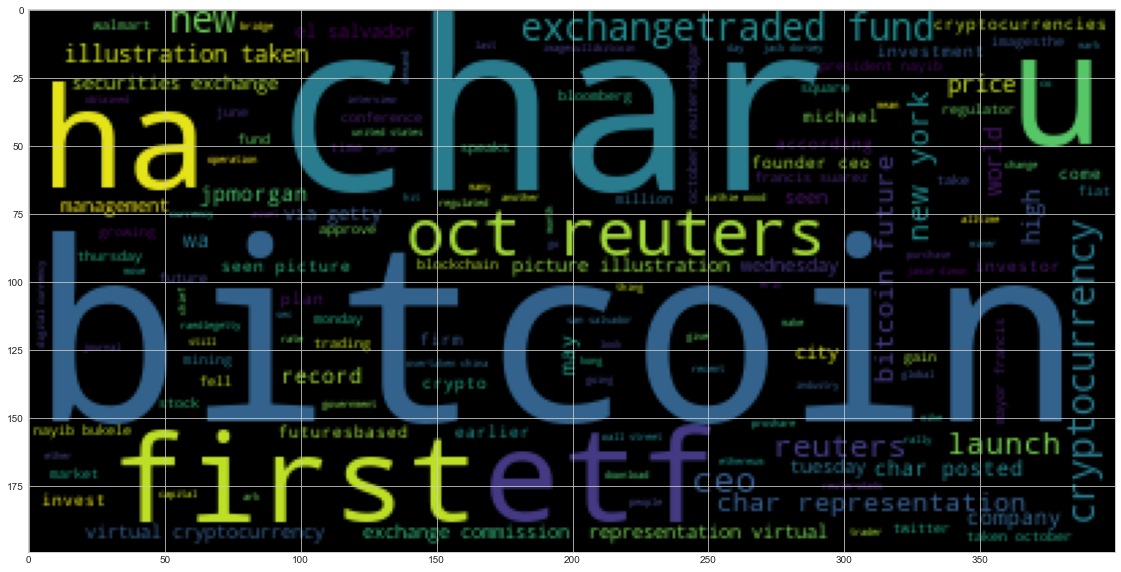

In [23]:
# Generate the Bitcoin word cloud
bitcoin_text = ' '.join(bitcoin_tokens_content)
bitcoin_wc = WordCloud().generate(bitcoin_text)
plt.imshow(bitcoin_wc)


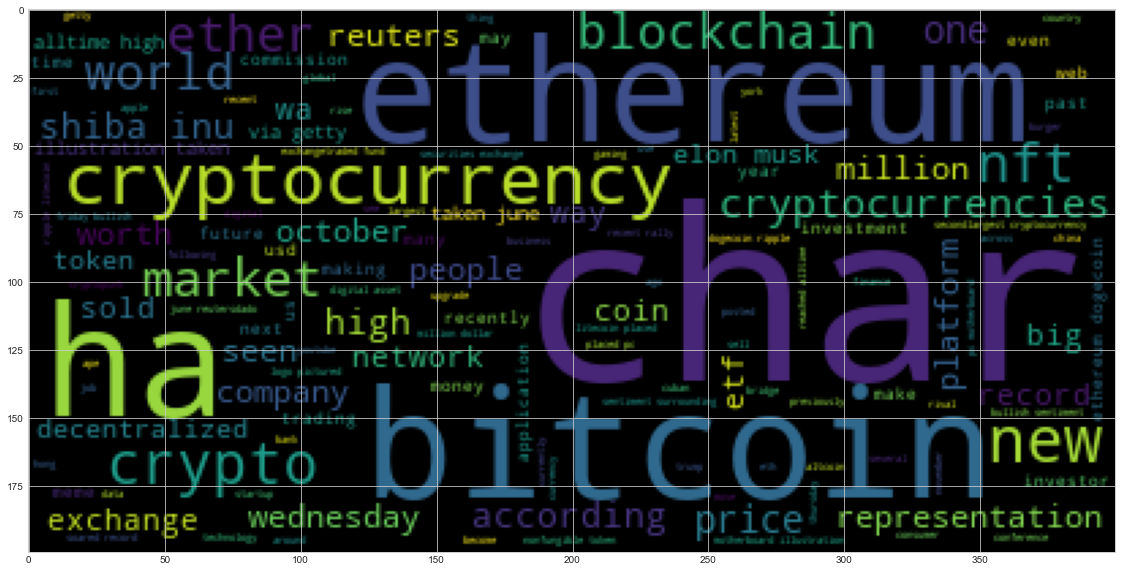

In [24]:
# Generate the Ethereum word cloud
ethereum_text = ' '.join(ethereum_tokens_content)
ethereum_wc = WordCloud().generate(ethereum_text)
plt.imshow(ethereum_wc)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_tokens_content)


In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')


In [30]:
# List all Entities
bitcoin_entities = [ent.text for ent in bitcoin_doc.ents]
bitcoin_entities

['earlier year',
 'wednesday',
 'china',
 'wall street journal',
 'three',
 'investorsas',
 'bloomberg',
 'canada',
 'alberta',
 'june',
 'reutersdado ruvicillustrationhong kong',
 'reuters',
 'october',
 'reuters',
 'char securities exchange commission',
 'kellythe us securities exchange commission',
 'four',
 'october',
 'october',
 'reuters',
 'october',
 'suhong kong',
 'reuters',
 'wednesday',
 'first',
 'reuters',
 'tuesday',
 'tuesday',
 'conventionmarco bellogetty',
 'imagesthe securities exchange commission',
 'etfs',
 'us securities exchange commission',
 'first',
 'mexican',
 'benito juarez',
 'january',
 'june',
 'jamie dimon',
 'jpmorgan chase',
 'monday',
 'six month',
 'friday october',
 'first',
 'cuban',
 'cnbc',
 'wednesday',
 'char george soros',
 'earlier april',
 'july',
 'decade ago',
 'year old',
 'michael char representation',
 'october',
 'sunew york',
 'reuters',
 'first',
 'san salvador',
 'reuters el salvador',
 'million',
 'saturda',
 'first',
 'san salvado

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(ethereum_tokens_content)


In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')


In [34]:
# List all Entities
ethereum_entities = [ent.text for ent in ethereum_doc.ents]
ethereum_entities


['cuban',
 'cnbc',
 'wednesday',
 'two',
 'october',
 'november',
 'hong kong',
 'september',
 'ftx',
 'nftrobert nickelsberggetty',
 'june',
 'friday',
 'second',
 'june',
 'thursday',
 'pm',
 'new york',
 'xef',
 'buterin ethereumcrypto eth network',
 'one year',
 'june',
 'june',
 'suillustrationnew york',
 'oligopoly mastercard',
 'l',
 'matt damon',
 'cryptopunksrokas',
 'million',
 'reuters',
 'reuters',
 'wednesday',
 'first',
 'new york',
 'uk',
 'wednesday',
 'separa char',
 'august',
 'reutersdavid grayfile photosydney',
 'reuters commonwealth bank',
 'australia',
 'united states',
 'china',
 'north american',
 'million',
 'taoliang wang visual',
 'china',
 'eight',
 'promoti char securities exchange commission',
 'kellythe us securities exchange commission',
 'four',
 'october',
 'cuban',
 'cuban',
 'dallas mavericks',
 'shanghai',
 'june',
 'oct',
 'tokyo',
 'japan',
 'kyunghoonnov reuters',
 'sandbox hong',
 'tokyo',
 'japan',
 'kyunghoonreuters sandbox hong',
 'november',

---